<center>
Marketing Analytics For E-Commerce Market Place Company
</center>

In [1]:
import numpy as np
import pandas as pd

import matplotlib as plt
import seaborn as sns

import datetime as dt
from datetime import datetime

import warnings; warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt 

import statistics
import pandas_profiling 
from pandas_profiling import ProfileReport

from sklearn.model_selection import train_test_split

from statsmodels.api import OLS

In [2]:
customers = pd.read_csv('CUSTOMERS.csv')
sellers = pd.read_csv('SELLERS.csv')
products = pd.read_csv('PRODUCTS.csv')
orders = pd.read_csv('ORDERS.csv')
order_items = pd.read_csv('ORDER_ITEMS.csv')
order_payments = pd.read_csv('ORDER_PAYMENTS.csv')
order_review_ratings = pd.read_csv('ORDER_REVIEW_RATINGS.csv')
geolocation = pd.read_csv('GEO_LOCATION.csv')

print('CUSTOMERS :' ,customers.columns)
print('*'*125)
print('SELLERS :', sellers.columns )
print('*'*125)
print('PRODUCTS :', products.columns )
print('*'*125)
print('ORDERS :', orders.columns )
print('*'*125)
print(' ORDER_ITEMS :', order_items.columns )
print('*'*125)
print('ORDER_PAYMENTS :',order_payments.columns )
print('*'*125)
print(' ORDER_REVIEW_RATINGS :', order_review_ratings.columns )
print('*'*125)
print('GEOLOCATION :',geolocation.columns )

CUSTOMERS : Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')
*****************************************************************************************************************************
SELLERS : Index(['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state'], dtype='object')
*****************************************************************************************************************************
PRODUCTS : Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')
*****************************************************************************************************************************
ORDERS : Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'or

In [3]:
print('CUSOMER :')
print(customers.isnull().sum())
print('*'*125)

print('SELLER :')
print(sellers.isnull().sum())
print('*'*125)

print('PRODUCTS :')
print(products.isnull().sum())
print('*'*125)

print('ORDERS :')
print(orders.isnull().sum())
print('*'*125)

print('ORDER_ITEMS :' )
print(order_items.isnull().sum())
print('*'*125)

print('ORDER_PAYMENTS :' )
print(order_payments.isnull().sum())
print('*'*125)

print('ORDER_REVIEW_RATINGS :')
print(order_review_ratings.isnull().sum())
print('*'*125)

print('GEOLOCATION :')
print(geolocation.isnull().sum())

CUSOMER :
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
*****************************************************************************************************************************
SELLER :
seller_id                  0
seller_zip_code_prefix     0
seller_city               57
seller_state              57
dtype: int64
*****************************************************************************************************************************
PRODUCTS :
product_id                      0
product_category_name         623
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64
***********************************************************************************************************

In [4]:
data = pd.merge(left = customers, right= orders, how= 'inner', left_on= 'customer_id', right_on= 'customer_id' )
data = pd.merge(left = data, right= order_items, how= 'inner', left_on= 'order_id', right_on= 'order_id')
data = pd.merge(left = data, right= products, how= 'inner', left_on= 'product_id', right_on= 'product_id')
data = pd.merge(left = data, right= order_payments, how= 'inner', left_on= 'order_id', right_on= 'order_id')
data = pd.merge(left = data, right= order_review_ratings, how= 'inner', left_on= 'order_id', right_on= 'order_id')
data = pd.merge(left = data, right= sellers, how= 'inner', left_on= 'seller_id', right_on= 'seller_id')
data = pd.merge(left = data, right= geolocation, how= 'inner', left_on= 'customer_zip_code_prefix', right_on= 'geolocation_zip_code_prefix')

## Perform Detailed exploratory analysis

### a. Define & calculate high level metrics like (Total Revenue, Total quantity, Total products, Total categories, Total sellers, Total locations, Total channels, Total payment methods etc…)

In [5]:
#Calculate Total Revenue
total_revenue = order_payments['payment_value'].sum()

# Calculate Total Quantity
total_quantity = products['product_photos_qty'].sum()

# Calculate Total Products
total_products = products['product_id'].nunique()

# Calculate Total Categories
total_categories = products['product_category_name'].nunique()

# Calculate Total Sellers
total_sellers = sellers['seller_id'].nunique()

# Calculate Total Locations
total_locations = geolocation['geolocation_city'].nunique()

# Calculate Total Channels
total_channels = order_payments['payment_type'].nunique()

# Calculate Total Payment Methods
total_payment_methods = order_payments['payment_type'].nunique()

# Print the results
print("Total Revenue:", total_revenue)
print("Total Quantity:", total_quantity)
print("Total Products:", total_products)
print("Total Categories:", total_categories)
print("Total Sellers:", total_sellers)
print("Total Locations:", total_locations)
print("Total Channels:", total_channels)
print("Total Payment Methods:", total_payment_methods)

Total Revenue: 16008872.12
Total Quantity: 70794.0
Total Products: 32951
Total Categories: 71
Total Sellers: 3095
Total Locations: 3809
Total Channels: 5
Total Payment Methods: 5


### b. Understanding how many new customers acquired every month

In [6]:
orders.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

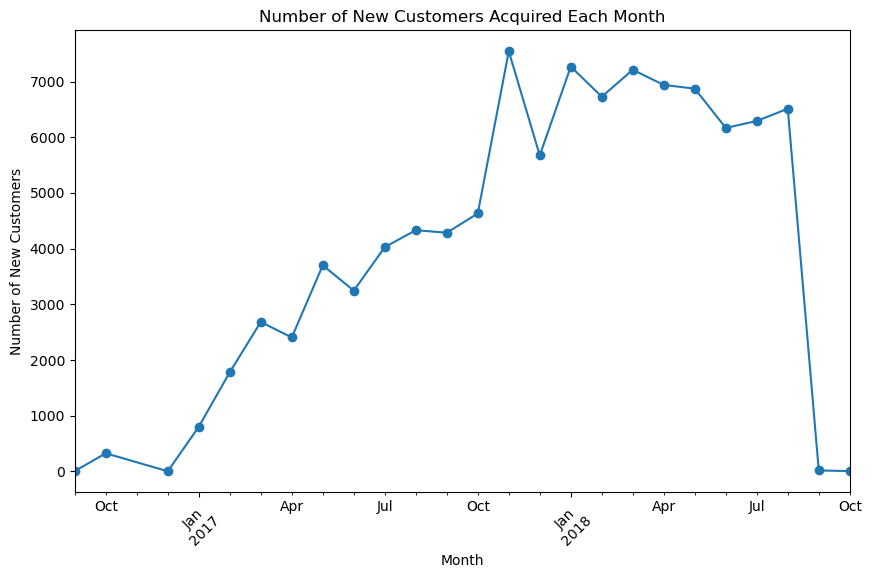

In [7]:
# Convert order timestamp to datetime format
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

# Extract month and year from order timestamp
orders['order_month'] = orders['order_purchase_timestamp'].dt.to_period('M')

# Merge Customers and Orders DataFrame on customer_id
merged_df = pd.merge(orders, customers, how='inner', on='customer_id')

# Filter orders made by new customers in each month
new_customers_per_month = merged_df.groupby('order_month')['customer_id'].nunique()

# Plotting the results
plt.figure(figsize=(10, 6))
new_customers_per_month.plot(marker='o')
plt.title('Number of New Customers Acquired Each Month')
plt.xlabel('Month')
plt.ylabel('Number of New Customers')
plt.xticks(rotation=45)
plt.show()


### c. Understand the retention of customers on month on month basis

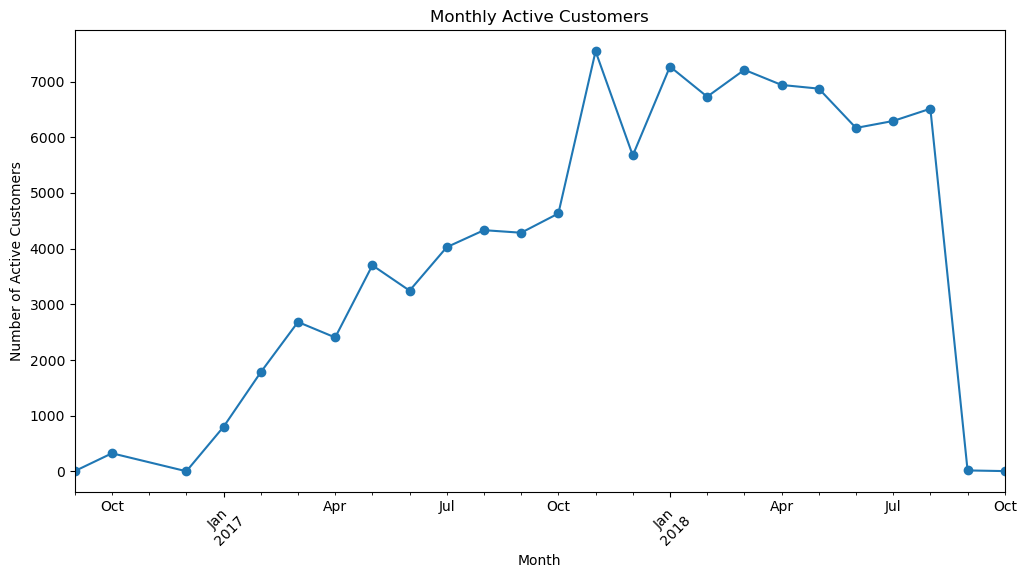

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have loaded the data into DataFrames
customers_df = pd.read_csv("CUSTOMERS.csv")
orders_df = pd.read_csv("ORDERS.csv")

# Convert order timestamp to datetime format
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])

# Extract month and year from order timestamp
orders_df['order_month'] = orders_df['order_purchase_timestamp'].dt.to_period('M')

# Merge Customers and Orders DataFrame on customer_id
merged_df = pd.merge(orders_df, customers_df, how='inner', on='customer_id')

# Create a DataFrame to track active customers per month
active_customers_per_month = merged_df.groupby(['order_month', 'customer_id']).size().reset_index(name='count')

# Create a pivot table to track monthly active customers
monthly_active_customers = active_customers_per_month.pivot_table(index='order_month', columns='customer_id', values='count', aggfunc='count')

# Plotting the monthly active customers
plt.figure(figsize=(12, 6))
monthly_active_customers.sum(axis=1).plot(marker='o')
plt.title('Monthly Active Customers')
plt.xlabel('Month')
plt.ylabel('Number of Active Customers')
plt.xticks(rotation=45)
plt.show()


### d. How the revenues from existing/new customers on month on month basis

<Figure size 2000x1000 with 0 Axes>

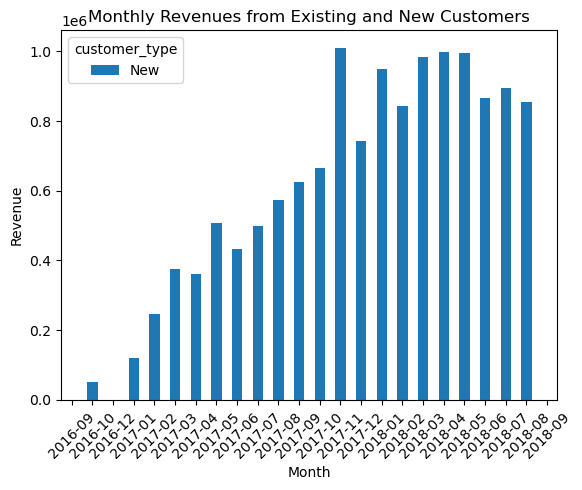

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have loaded the data into DataFrames
customers_df = pd.read_csv("CUSTOMERS.csv")
orders_df = pd.read_csv("ORDERS.csv")
order_items_df = pd.read_csv("ORDER_ITEMS.csv")

# Convert order timestamp to datetime format
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])

# Extract month and year from order timestamp
orders_df['order_month'] = orders_df['order_purchase_timestamp'].dt.to_period('M')

# Merge Customers, Orders, and Order_Items DataFrames
merged_df = pd.merge(orders_df, customers_df, how='inner', on='customer_id')
merged_df = pd.merge(merged_df, order_items_df, how='inner', on='order_id')

# Define existing and new customers
existing_customers = merged_df.groupby('customer_id')['order_month'].min()
new_customers = merged_df.groupby('customer_id')['order_month'].max()

# Identify orders from existing and new customers
merged_df['customer_type'] = 'Existing'
merged_df.loc[merged_df['order_month'].isin(new_customers), 'customer_type'] = 'New'

# Calculate monthly revenues for existing and new customers
monthly_revenue = merged_df.groupby(['order_month', 'customer_type'])['price'].sum().unstack()

# Plotting the results
plt.figure(figsize=(20, 10))
monthly_revenue.plot(kind='bar', stacked=True)
plt.title('Monthly Revenues from Existing and New Customers')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()


### e. Understand the trends/seasonality of sales, quantity by category, location, month, week, day, time, channel, payment method etc…

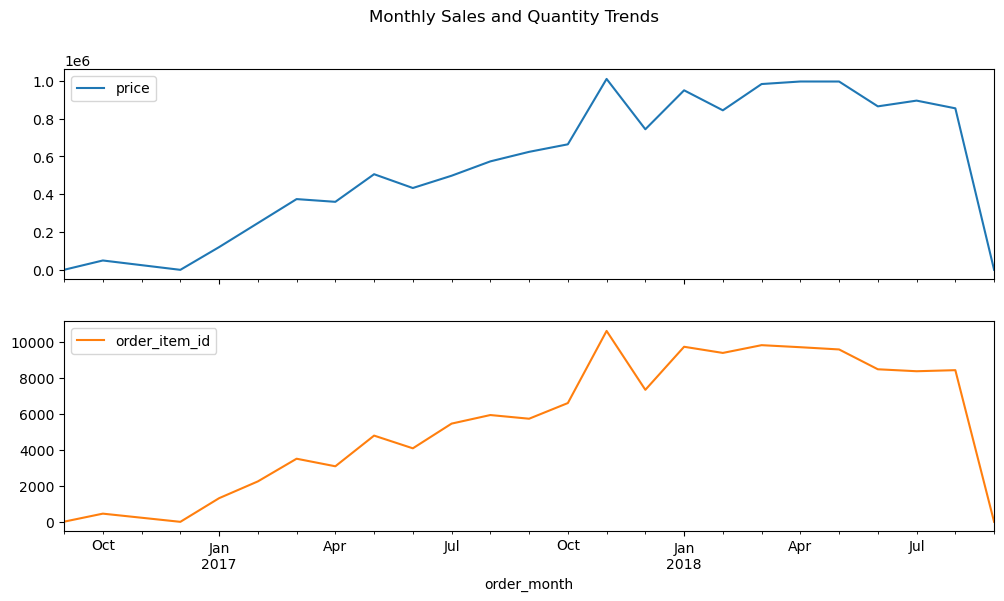

In [10]:
# Monthly Sales and Quantity (Subsetting Data)
monthly_sales_quantity = merged_df.groupby('order_month').agg({'price': 'sum', 'order_item_id': 'sum'})
monthly_sales_quantity.plot(figsize=(12, 6), subplots=True)
plt.suptitle('Monthly Sales and Quantity Trends')
plt.show()
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have loaded the data into DataFrames
orders_df = pd.read_csv("ORDERS.csv")
order_items_df = pd.read_csv("ORDER_ITEMS.csv")
products_df = pd.read_csv("PRODUCTS.csv")
customers_df = pd.read_csv("CUSTOMERS.csv")

# Merge Orders, Order_Items, Products, and Customers DataFrames
merged_df = pd.merge(
    pd.merge(
        pd.merge(orders_df, order_items_df, how='inner', on='order_id'),
        products_df, how='inner', on='product_id'
    ),
    customers_df, how='inner', on='customer_id'
)

# Extract additional time-related features
merged_df['order_purchase_timestamp'] = pd.to_datetime(merged_df['order_purchase_timestamp'])
merged_df['order_month'] = merged_df['order_purchase_timestamp'].dt.to_period('M')
merged_df['order_week'] = merged_df['order_purchase_timestamp'].dt.to_period('W')
merged_df['order_day'] = merged_df['order_purchase_timestamp'].dt.day
merged_df['order_hour'] = merged_df['order_purchase_timestamp'].dt.hour

subset_data = merged_df.sample(1000)


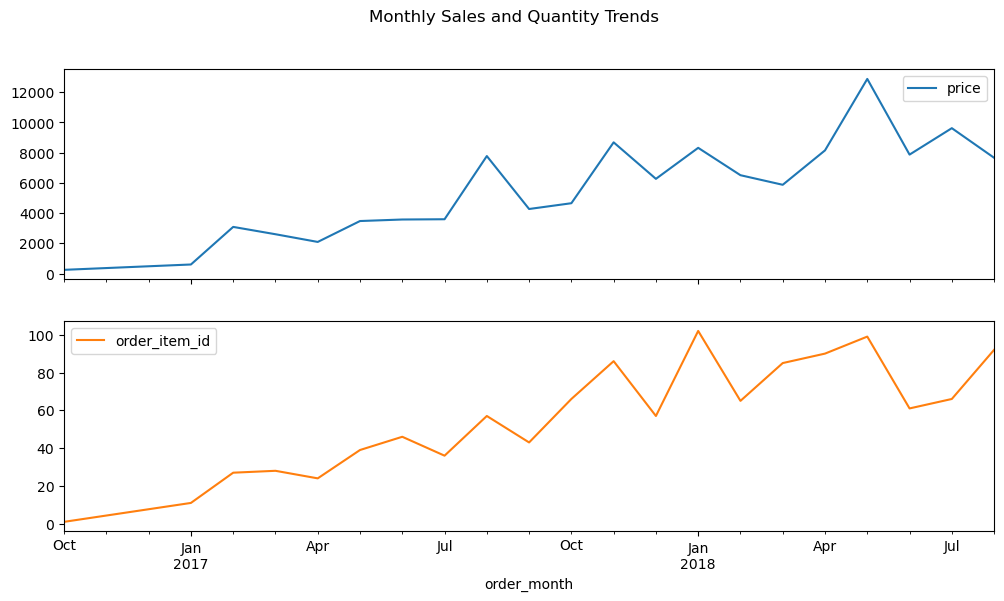

In [11]:
# Monthly Sales and Quantity (Subsetting Data)
monthly_sales_quantity = subset_data.groupby('order_month').agg({'price': 'sum', 'order_item_id': 'sum'})
monthly_sales_quantity.plot(figsize=(12, 6), subplots=True)
plt.suptitle('Monthly Sales and Quantity Trends')
plt.show()


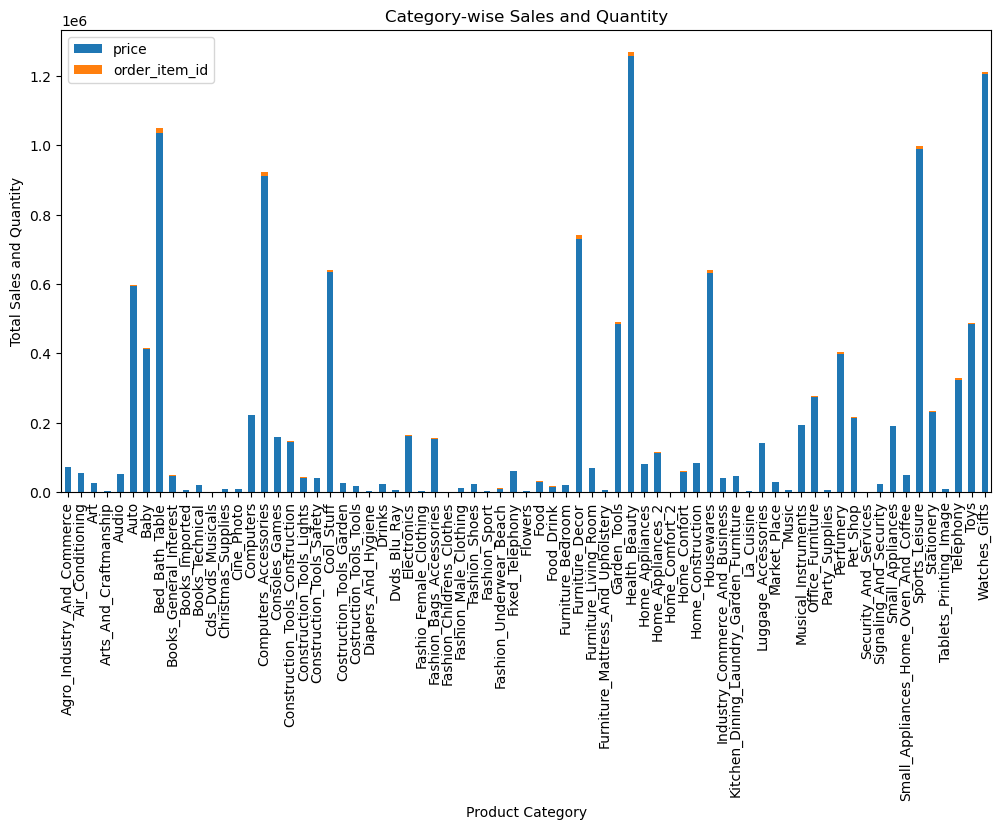

In [12]:
# Category-wise Sales and Quantity
category_sales_quantity = merged_df.groupby('product_category_name').agg({'price': 'sum', 'order_item_id': 'sum'})
category_sales_quantity.plot(kind='bar', figsize=(12, 6), stacked=True)
plt.title('Category-wise Sales and Quantity')
plt.xlabel('Product Category')
plt.ylabel('Total Sales and Quantity')
plt.show()



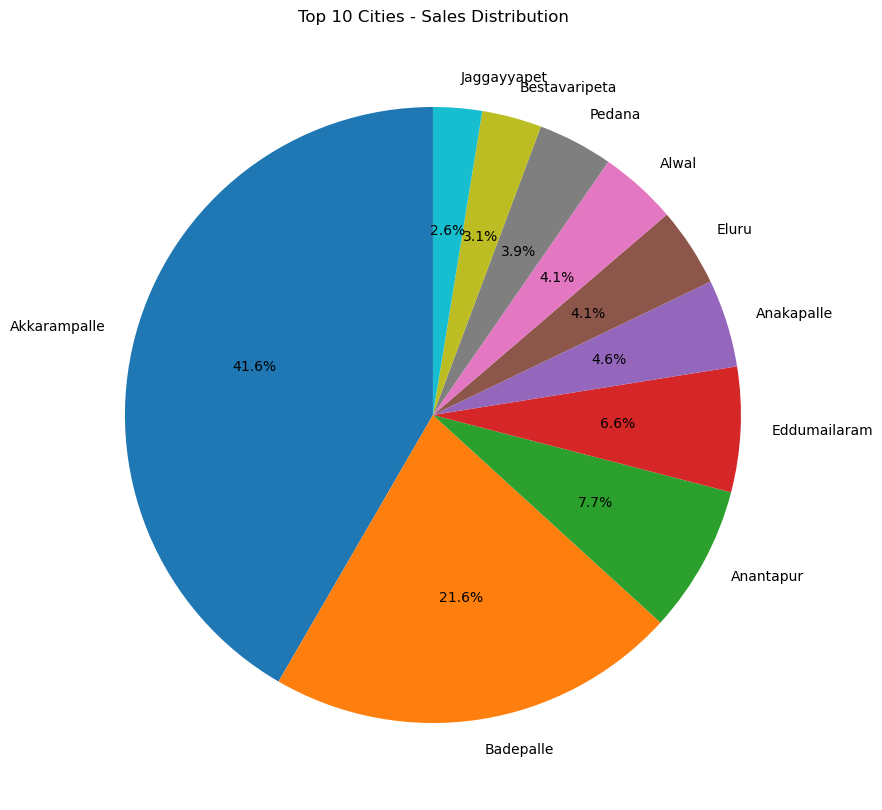

In [13]:
# Location-wise Sales (Pie Chart)
location_sales = merged_df.groupby('customer_city')['price'].sum()

# Select the top N cities for better visualization
top_cities = location_sales.nlargest(10)

# Plotting a Pie Chart
plt.figure(figsize=(10, 10))
plt.pie(top_cities, labels=top_cities.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 10 Cities - Sales Distribution')
plt.show()


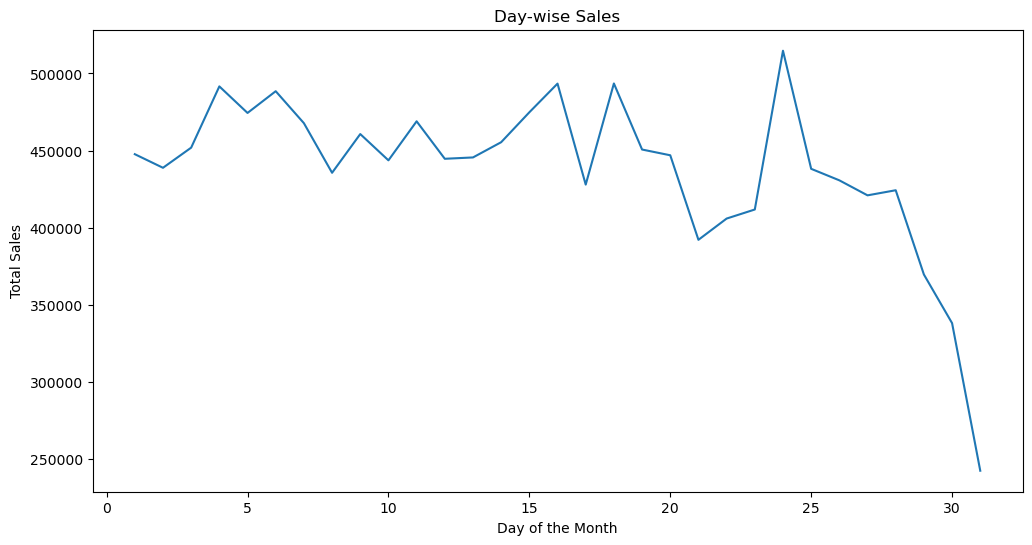

In [14]:
# Day-wise Sales
day_sales = merged_df.groupby('order_day')['price'].sum()
day_sales.plot(figsize=(12, 6))
plt.title('Day-wise Sales')
plt.xlabel('Day of the Month')
plt.ylabel('Total Sales')
plt.show()



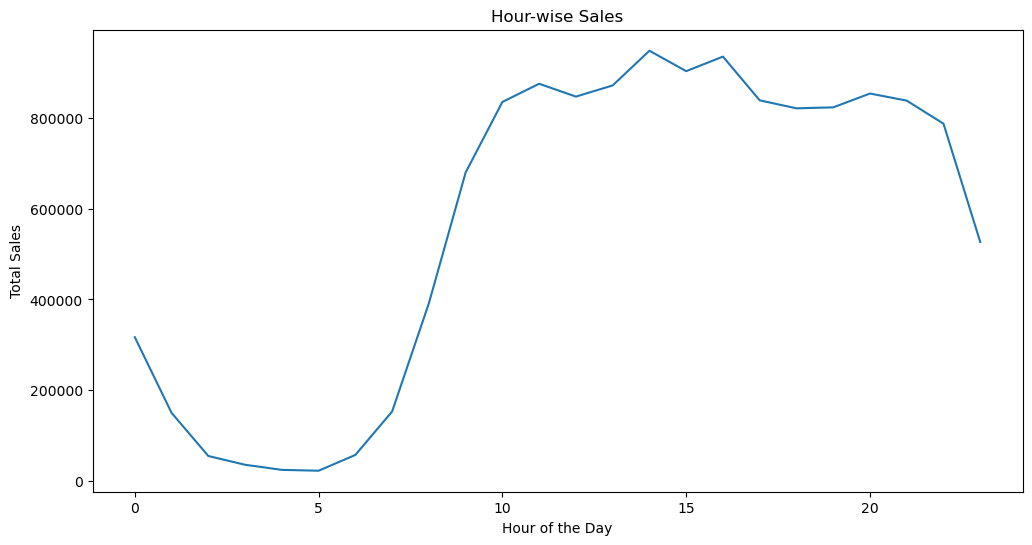

In [15]:
# Hour-wise Sales
hour_sales = merged_df.groupby('order_hour')['price'].sum()
hour_sales.plot(figsize=(12, 6))
plt.title('Hour-wise Sales')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales')
plt.show()

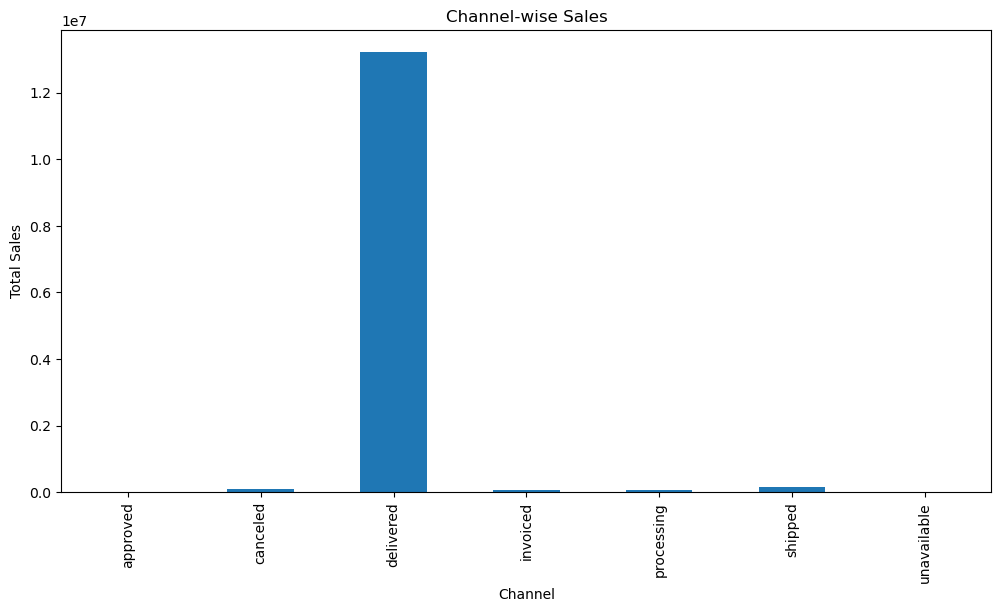

In [16]:
merged_df['channel'] = merged_df['order_status']

# Channel-wise Sales
channel_sales = merged_df.groupby('channel')['price'].sum()
channel_sales.plot(kind='bar', figsize=(12, 6))
plt.title('Channel-wise Sales')
plt.xlabel('Channel')
plt.ylabel('Total Sales')
plt.show()


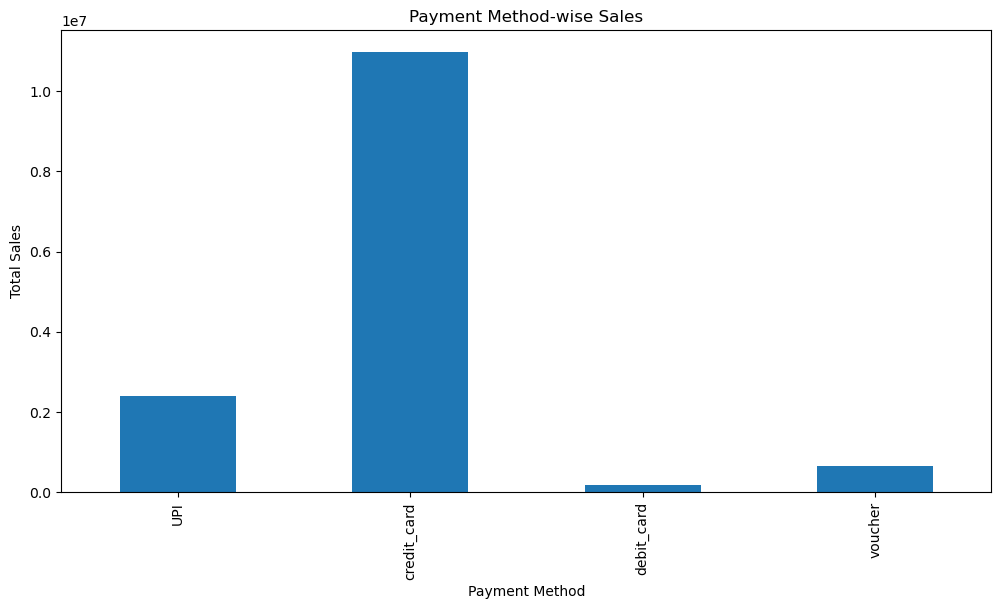

In [17]:
# Merge order_payments with merged_df on 'order_id'
merged_payments_df = pd.merge(merged_df, order_payments, on='order_id')

# Payment Method-wise Sales
payment_method_sales = merged_payments_df.groupby('payment_type')['price'].sum()
payment_method_sales.plot(kind='bar', figsize=(12, 6))
plt.title('Payment Method-wise Sales')
plt.xlabel('Payment Method')
plt.ylabel('Total Sales')
plt.show()


### f. Popular Products by month, seller, state, category.

In [18]:
# Popular Products by Month
popular_products_month = merged_df.groupby(['order_month', 'product_id'])['price'].sum().reset_index()
popular_products_month = popular_products_month.sort_values(by=['order_month', 'price'], ascending=[True, False])
popular_products_month = popular_products_month.drop_duplicates(subset='order_month')

# Popular Products by Seller
popular_products_seller = merged_df.groupby(['seller_id', 'product_id'])['price'].sum().reset_index()
popular_products_seller = popular_products_seller.sort_values(by=['seller_id', 'price'], ascending=[True, False])
popular_products_seller = popular_products_seller.drop_duplicates(subset='seller_id')

# Popular Products by State
popular_products_state = merged_df.groupby(['customer_state', 'product_id'])['price'].sum().reset_index()
popular_products_state = popular_products_state.sort_values(by=['customer_state', 'price'], ascending=[True, False])
popular_products_state = popular_products_state.drop_duplicates(subset='customer_state')

# Popular Products by Category
popular_products_category = merged_df.groupby(['product_category_name', 'product_id'])['price'].sum().reset_index()
popular_products_category = popular_products_category.sort_values(by=['product_category_name', 'price'], ascending=[True, False])
popular_products_category = popular_products_category.drop_duplicates(subset='product_category_name')

# Display the results or save them as needed
print("Popular Products by Month:\n", popular_products_month)
print("\nPopular Products by Seller:\n", popular_products_seller)
print("\nPopular Products by State:\n", popular_products_state)
print("\nPopular Products by Category:\n", popular_products_category)


Popular Products by Month:
       order_month                        product_id     price
0         2016-09  5a6b04657a4c5ee34285d1e4619a96b4    134.97
257       2016-10  eba7488e1c67729f045ab43fac426f2e   2748.90
278       2016-12  f5d8f4fbc70ca2a0038b9a0010ed5cb0     10.90
451       2017-01  4a90b44b456e79e7a33435fdd36e551f   3420.00
1241      2017-02  489ae2aa008f021502940f251d4cce7f   6735.00
2645      2017-03  470433f95ba906e17efac3fce39e9ffd   8999.67
4316      2017-04  3ecf69ee1fe21cfd40b30cbea549e563   5178.00
5876      2017-05  1bdf5e6731585cf01aa8169c7028d6ad   6499.00
9978      2017-06  fd0065af7f09af4b82a0ca8f3eed1852  17999.91
12381     2017-07  f1c7f353075ce59d8a6f3cf58f419c9c  12095.00
14930     2017-08  d6160fb7873f184099d9bc95e30376af  11000.00
17743     2017-09  d6160fb7873f184099d9bc95e30376af  29899.39
19269     2017-10  588531f8ec37e7d5ff5b7b22ea0488f8  17244.00
23023     2017-11  6a162a899a815ed15db1689e8efc976c   6349.00
26095     2017-12  1dec4c88c685d5a07bf01dc

### g. Popular categories by state, month

In [19]:
# Popular Categories by State
popular_categories_state = merged_df.groupby(['customer_state', 'product_category_name'])['price'].sum().reset_index()
popular_categories_state = popular_categories_state.sort_values(by=['customer_state', 'price'], ascending=[True, False])
popular_categories_state = popular_categories_state.drop_duplicates(subset='customer_state')

# Popular Categories by Month
popular_categories_month = merged_df.groupby(['order_month', 'product_category_name'])['price'].sum().reset_index()
popular_categories_month = popular_categories_month.sort_values(by=['order_month', 'price'], ascending=[True, False])
popular_categories_month = popular_categories_month.drop_duplicates(subset='order_month')

# Display the results or save them as needed
print("Popular Categories by State:\n", popular_categories_state)
print("\nPopular Categories by Month:\n", popular_categories_month)


Popular Categories by State:
          customer_state product_category_name      price
43       Andhra Pradesh         Health_Beauty  743347.46
104   Arunachal Pradesh         Health_Beauty   18617.30
191        Chhattisgarh         Watches_Gifts   85909.51
229               Delhi         Health_Beauty   49127.54
262                 Goa      Office_Furniture     169.99
327             Gujarat        Sports_Leisure   92277.27
367             Haryana         Health_Beauty   32664.64
441    Himachal Pradesh         Watches_Gifts   14867.81
498     Jammu & Kashmir         Watches_Gifts   20655.15
561           Karnataka         Watches_Gifts   47505.52
618              Kerala         Watches_Gifts   18262.18
684      Madhya Pradesh         Watches_Gifts   36954.05
722         Maharashtra         Health_Beauty   29388.62
774              Orissa         Health_Beauty   11278.63
825              Punjab         Health_Beauty    9847.01
890           Rajasthan        Sports_Leisure   15141.39
9

### h. List top 10 most expensive products sorted by price

In [20]:
# List Top 10 Most Expensive Products
top_expensive_products = merged_df[['product_id', 'product_category_name', 'price']].sort_values(by='price', ascending=False).head(10)

# Display the results or save them as needed
print("Top 10 Most Expensive Products:\n", top_expensive_products)


Top 10 Most Expensive Products:
                               product_id product_category_name    price
79576   489ae2aa008f021502940f251d4cce7f            Housewares  6735.00
85210   69c590f7ffc7bf8db97190b6cb6ed62e             Computers  6729.00
40056   1bdf5e6731585cf01aa8169c7028d6ad                   Art  6499.00
99279   a6492cc69376c469ab6f61d8f44de961      Small_Appliances  4799.00
93001   c3ed642d592594bb648ff4a04cee2747      Small_Appliances  4690.00
93013   259037a6a41845e455183f89c5035f18             Computers  4590.00
65135   a1beef8f3992dbd4cd8726796aa69c53   Musical_Instruments  4399.87
76473   6cdf8fc1d741c76586d8b6b15e9eef30        Consoles_Games  4099.99
35564   dd113cb02b2af9c8e5787e8f1f0722f6        Sports_Leisure  4059.00
100739  6902c1962dd19d540807d0ab8fade5c6         Watches_Gifts  3999.90


## Performing Customers/sellers Segmentation

### a. Divide the customers into groups based on the revenue generated

In [21]:
# Group customers based on the total revenue they generated
customer_revenue = merged_df.groupby('customer_id')['price'].sum().reset_index()
customer_revenue.rename(columns={'price': 'total_revenue'}, inplace=True)

# Define the segmentation criteria (e.g., quartiles)
revenue_quartiles = pd.qcut(customer_revenue['total_revenue'], q=[0, 0.25, 0.5, 0.75, 1.0], labels=['Low', 'Medium', 'High', 'Very High'])

# Add the segmentation results to the customer_revenue DataFrame
customer_revenue['segment'] = revenue_quartiles

# Display or use the segmented customer data
print("Segmented Customers based on Revenue:\n", customer_revenue)


Segmented Customers based on Revenue:
                             customer_id  total_revenue    segment
0      00012a2ce6f8dcda20d059ce98491703          89.80       High
1      000161a058600d5901f007fab4c27140          54.90     Medium
2      0001fd6190edaaf884bcaf3d49edf079         179.99  Very High
3      0002414f95344307404f0ace7a26f1d5         149.90       High
4      000379cdec625522490c315e70c7a9fb          93.00       High
...                                 ...            ...        ...
98661  fffcb937e9dd47a13f05ecb8290f4d3e          78.00     Medium
98662  fffecc9f79fd8c764f843e9951b11341          54.90     Medium
98663  fffeda5b6d849fbd39689bb92087f431          47.90     Medium
98664  ffff42319e9b2d713724ae527742af25         199.90  Very High
98665  ffffa3172527f765de70084a7e53aae8          21.80        Low

[98666 rows x 3 columns]


### b. Divide the sellers into groups based on the revenue generated

In [22]:
# Group sellers based on the total revenue they generated
seller_revenue = merged_df.groupby('seller_id')['price'].sum().reset_index()
seller_revenue.rename(columns={'price': 'total_revenue'}, inplace=True)

# Define the segmentation criteria (e.g., quartiles)
revenue_quartiles = pd.qcut(seller_revenue['total_revenue'], q=[0, 0.25, 0.5, 0.75, 1.0], labels=['Low', 'Medium', 'High', 'Very High'])

# Add the segmentation results to the seller_revenue DataFrame
seller_revenue['segment'] = revenue_quartiles

# Display or use the segmented seller data
print("Segmented Sellers based on Revenue:\n", seller_revenue)


Segmented Sellers based on Revenue:
                              seller_id  total_revenue    segment
0     0015a82c2db000af6aaaf3ae2ecb0532        2685.00       High
1     001cca7ae9ae17fb1caed9dfb1094831       25080.03  Very High
2     001e6ad469a905060d959994f1b41e4f         250.00     Medium
3     002100f778ceb8431b7a1020ff7ab48f        1234.50       High
4     003554e2dce176b5555353e4f3555ac8         120.00        Low
...                                ...            ...        ...
3090  ffcfefa19b08742c5d315f2791395ee5          69.90        Low
3091  ffdd9f82b9a447f6f8d4b91554cc7dd3        2101.20       High
3092  ffeee66ac5d5a62fe688b9d26f83f534        1839.86       High
3093  fffd5413c0700ac820c7069d66d98c89        9062.30  Very High
3094  ffff564a4f9085cd26170f4732393726        1426.30       High

[3095 rows x 3 columns]


## 3. Cross-Selling (Which products are selling together)
- Hint: We need to find which of the top 10 combinations of products are selling together in each transaction. (combination of 2 or 3 buying together)

In [23]:
import pandas as pd
from itertools import combinations
from collections import Counter

# Group by order_id and aggregate the product_ids in each order
order_product_groups = data.groupby('order_id')['product_category_name'].agg(list).reset_index()

# Create a list to store combinations of products
product_combinations = []

# Iterate through each order
for products in order_product_groups['product_category_name']:
    # Generate all combinations of 2 and 3 products in the order
    product_combinations.extend(combinations(products, 2))
    product_combinations.extend(combinations(products, 3))

# Count the occurrences of each product combination
product_combinations_count = Counter(product_combinations)

# Get the top 10 combinations
top_10_combinations = product_combinations_count.most_common(10)

# Display the top 10 combinations
print("Top 10 combinations of products sold together:")
for combination, count in top_10_combinations:
    print(f"Combination: {combination}, Count: {count}")


Top 10 combinations of products sold together:
Combination: ('Bed_Bath_Table', 'Bed_Bath_Table', 'Bed_Bath_Table'), Count: 22270
Combination: ('Bed_Bath_Table', 'Bed_Bath_Table', 'Housewares'), Count: 18088
Combination: ('Office_Furniture', 'Office_Furniture', 'Office_Furniture'), Count: 9615
Combination: ('Bed_Bath_Table', 'Housewares', 'Housewares'), Count: 8844
Combination: ('Garden_Tools', 'Garden_Tools', 'Garden_Tools'), Count: 7912
Combination: ('Bed_Bath_Table', 'Bed_Bath_Table'), Count: 5912
Combination: ('Furniture_Decor', 'Furniture_Decor', 'Furniture_Decor'), Count: 5427
Combination: ('Housewares', 'Housewares', 'Housewares'), Count: 5117
Combination: ('Computers_Accessories', 'Computers_Accessories', 'Computers_Accessories'), Count: 4912
Combination: ('Furniture_Decor', 'Furniture_Decor'), Count: 4524


## Payment Behaviour

### a. How customers are paying?

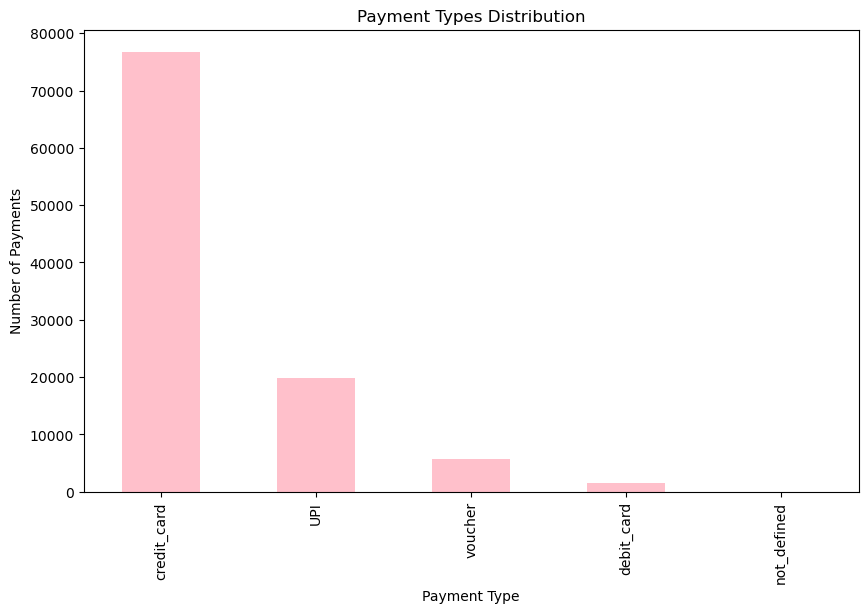

In [24]:
# Group by payment_type and count the occurrences
payment_type_counts = order_payments['payment_type'].value_counts()

# Plot a bar chart to visualize payment types
plt.figure(figsize=(10, 6))
payment_type_counts.plot(kind='bar', color='pink')
plt.title('Payment Types Distribution')
plt.xlabel('Payment Type')
plt.ylabel('Number of Payments')
plt.show()


### b. Which payment channels are used by most customers?

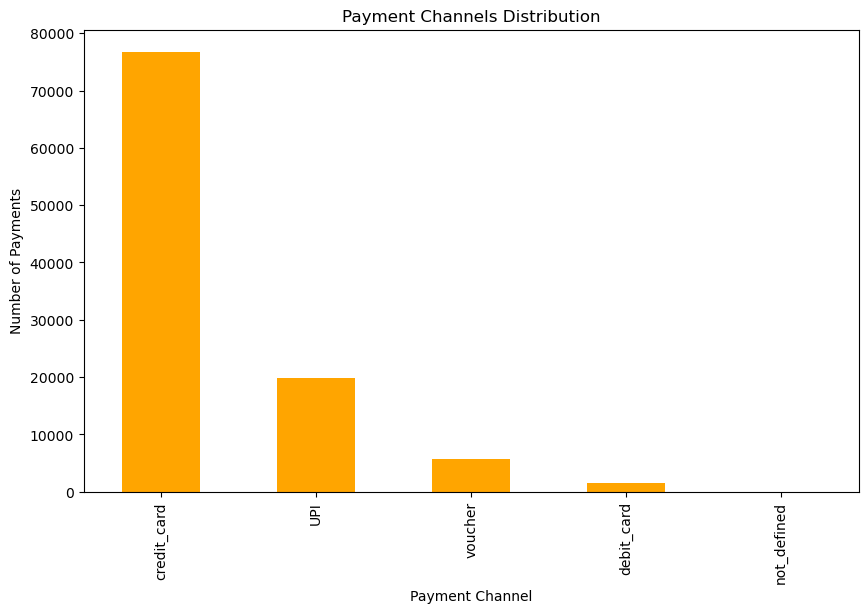

In [25]:
# Group by payment_type and count the occurrences
payment_channel_counts = order_payments['payment_type'].value_counts()

# Plot a bar chart to visualize payment channels
plt.figure(figsize=(10, 6))
payment_channel_counts.plot(kind='bar', color='orange')
plt.title('Payment Channels Distribution')
plt.xlabel('Payment Channel')
plt.ylabel('Number of Payments')
plt.show()


## Customer satisfaction towards category & product

### a. Which categories (top 10) are maximum rated & minimum rated?

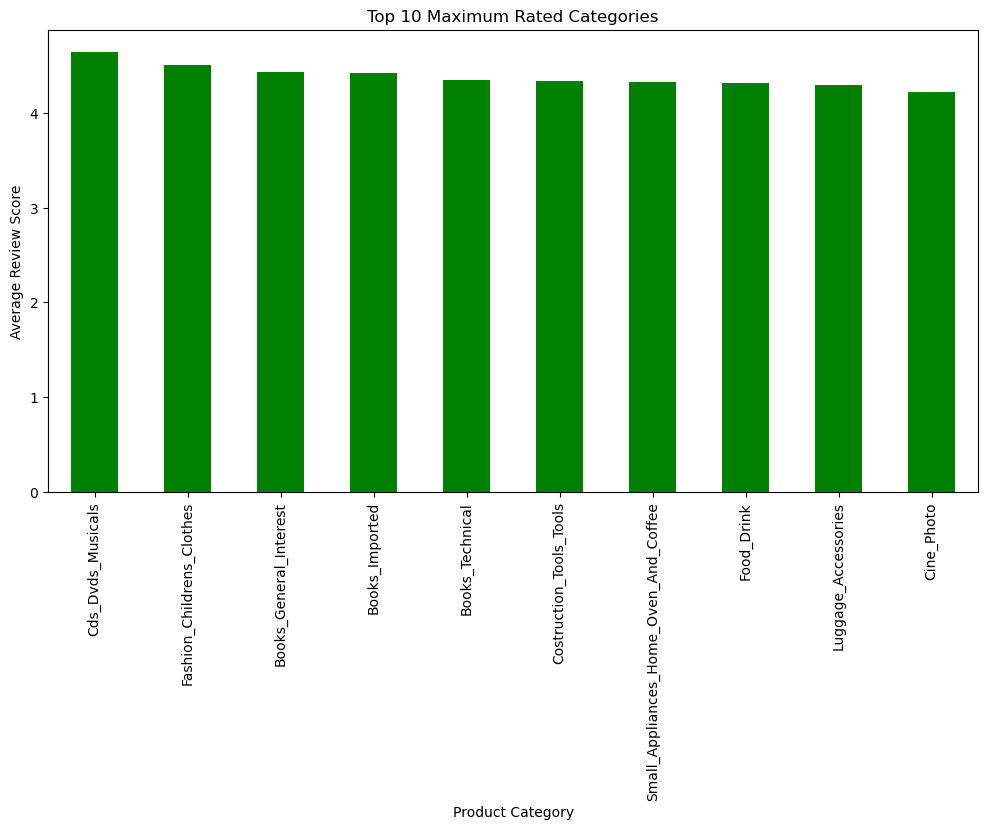

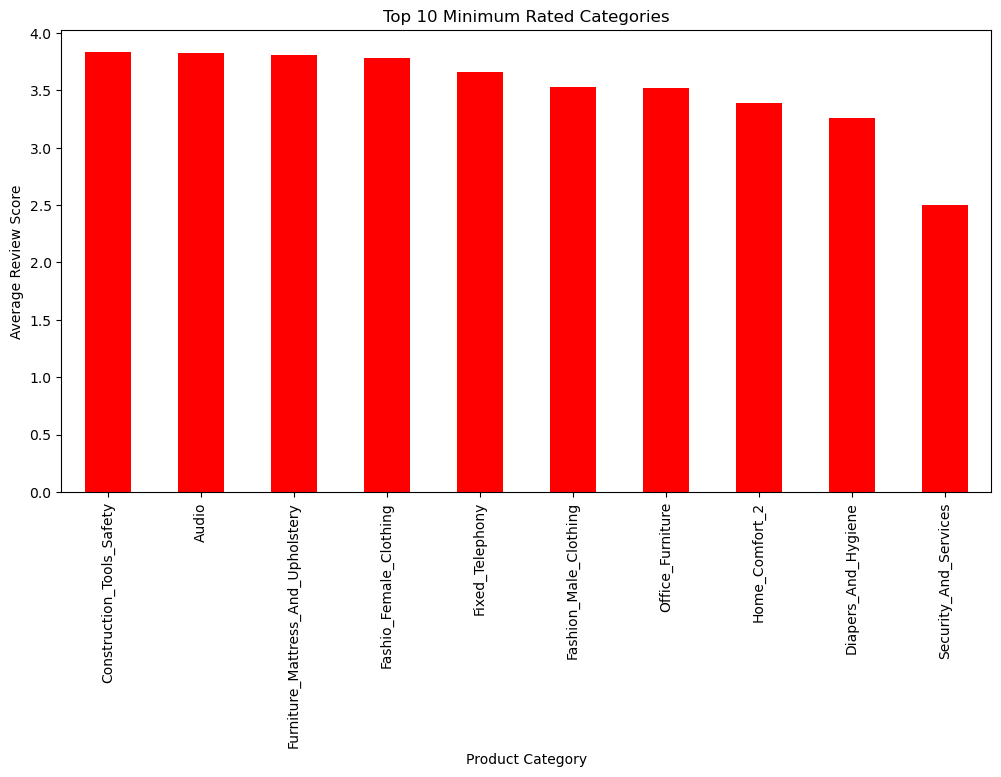

In [26]:
# Group by product category and calculate the average review score
category_avg_ratings = data.groupby('product_category_name')['review_score'].mean().sort_values(ascending=False)

# Plot a bar chart to visualize top 10 maximum rated categories
plt.figure(figsize=(12, 6))
category_avg_ratings.head(10).plot(kind='bar', color='green')
plt.title('Top 10 Maximum Rated Categories')
plt.xlabel('Product Category')
plt.ylabel('Average Review Score')
plt.show()

# Plot a bar chart to visualize top 10 minimum rated categories
plt.figure(figsize=(12, 6))
category_avg_ratings.tail(10).plot(kind='bar', color='red')
plt.title('Top 10 Minimum Rated Categories')
plt.xlabel('Product Category')
plt.ylabel('Average Review Score')
plt.show()


### b. Which products (top10) are maximum rated & minimum rated?

In [27]:
# Calculate average review score for each product
product_avg_ratings = data.groupby('product_category_name')['review_score'].mean()

# Get top 10 products with maximum and minimum ratings
top_10_max_rated = product_avg_ratings.nlargest(10)
top_10_min_rated = product_avg_ratings.nsmallest(10)

# Display the results
print("Top 10 Maximum Rated Products:")
print(top_10_max_rated)

print("\nTop 10 Minimum Rated Products:")
print(top_10_min_rated)


Top 10 Maximum Rated Products:
product_category_name
Cds_Dvds_Musicals                        4.642857
Fashion_Childrens_Clothes                4.500000
Books_General_Interest                   4.430851
Books_Imported                           4.419355
Books_Technical                          4.345588
Costruction_Tools_Tools                  4.333333
Small_Appliances_Home_Oven_And_Coffee    4.320513
Food_Drink                               4.312715
Luggage_Accessories                      4.289905
Cine_Photo                               4.216216
Name: review_score, dtype: float64

Top 10 Minimum Rated Products:
product_category_name
Security_And_Services                2.500000
Diapers_And_Hygiene                  3.256410
Home_Comfort_2                       3.387097
Office_Furniture                     3.516274
Fashion_Male_Clothing                3.531034
Fixed_Telephony                      3.660517
Fashio_Female_Clothing               3.780000
Furniture_Mattress_And_Upholstery   

### c. Average rating by location, seller, product, category, month etc.

In [28]:
# Average rating by location (customer_city)
average_rating_by_location = data.groupby('customer_city')['review_score'].mean().sort_values(ascending=False)

# Average rating by seller
average_rating_by_seller = data.groupby('seller_id')['review_score'].mean().sort_values(ascending=False)

# Average rating by product
average_rating_by_product = data.groupby('product_id')['review_score'].mean().sort_values(ascending=False)

# Average rating by product category
average_rating_by_category = data.groupby('product_category_name')['review_score'].mean().sort_values(ascending=False)

# Average rating by month
data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'])
data['order_month'] = data['order_purchase_timestamp'].dt.month
average_rating_by_month = data.groupby('order_month')['review_score'].mean().sort_index()

# Displaying results
print("Average Rating by Location:")
print(average_rating_by_location.head(10))

print("\nAverage Rating by Seller:")
print(average_rating_by_seller.head(10))

print("\nAverage Rating by Product:")
print(average_rating_by_product.head(10))

print("\nAverage Rating by Product Category:")
print(average_rating_by_category.head(10))

print("\nAverage Rating by Month:")
print(average_rating_by_month)


Average Rating by Location:
customer_city
Shivrajpur       5.0
Dasna            5.0
Tathavade        5.0
Konch            5.0
Ranipettai       5.0
Dariyabad        5.0
Tehri            5.0
Darappur         5.0
Kondumal         5.0
Koothuparamba    5.0
Name: review_score, dtype: float64

Average Rating by Seller:
seller_id
a9415cf907dfa12f9ed18693244f5329    5.0
2063dd1b9f568df1c16741ea7d3e6adb    5.0
e5def42655b7490edac5a56fe8e9e603    5.0
52b53f7061969fe471d119b6195da864    5.0
2039c5e51785b5dde7cf93ccb3b7be2c    5.0
204b4e07bddef3c9b317f70189135b22    5.0
a56a8043ebf66e42119618fb8cf232c6    5.0
528ce32f560edd11add4169f6a5b65be    5.0
2075d8cd4dd63ff12df0749a5866bb06    5.0
a81466620e46a6970b22ef40379fdfc9    5.0
Name: review_score, dtype: float64

Average Rating by Product:
product_id
00066f42aeeb9f3007548bb9d3f33c38    5.0
865bfa00c1dad8f4146d3c2765f051ca    5.0
868969d3a93aeeab7bfcd4fc3d3d65de    5.0
868766ed2172644fdd977d6bd395a107    5.0
8684bd8f93b4f4038d07188a23811e93    5.0
86